In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import csv
import os
import sys

In [17]:
data=pd.read_csv(r"C:\\Users\\ajodo\Desktop\cancer.csv")

In [19]:
Train=data
del Train['id']

In [20]:
Train.describe()
Train.info()
corr=Train.corr()
corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


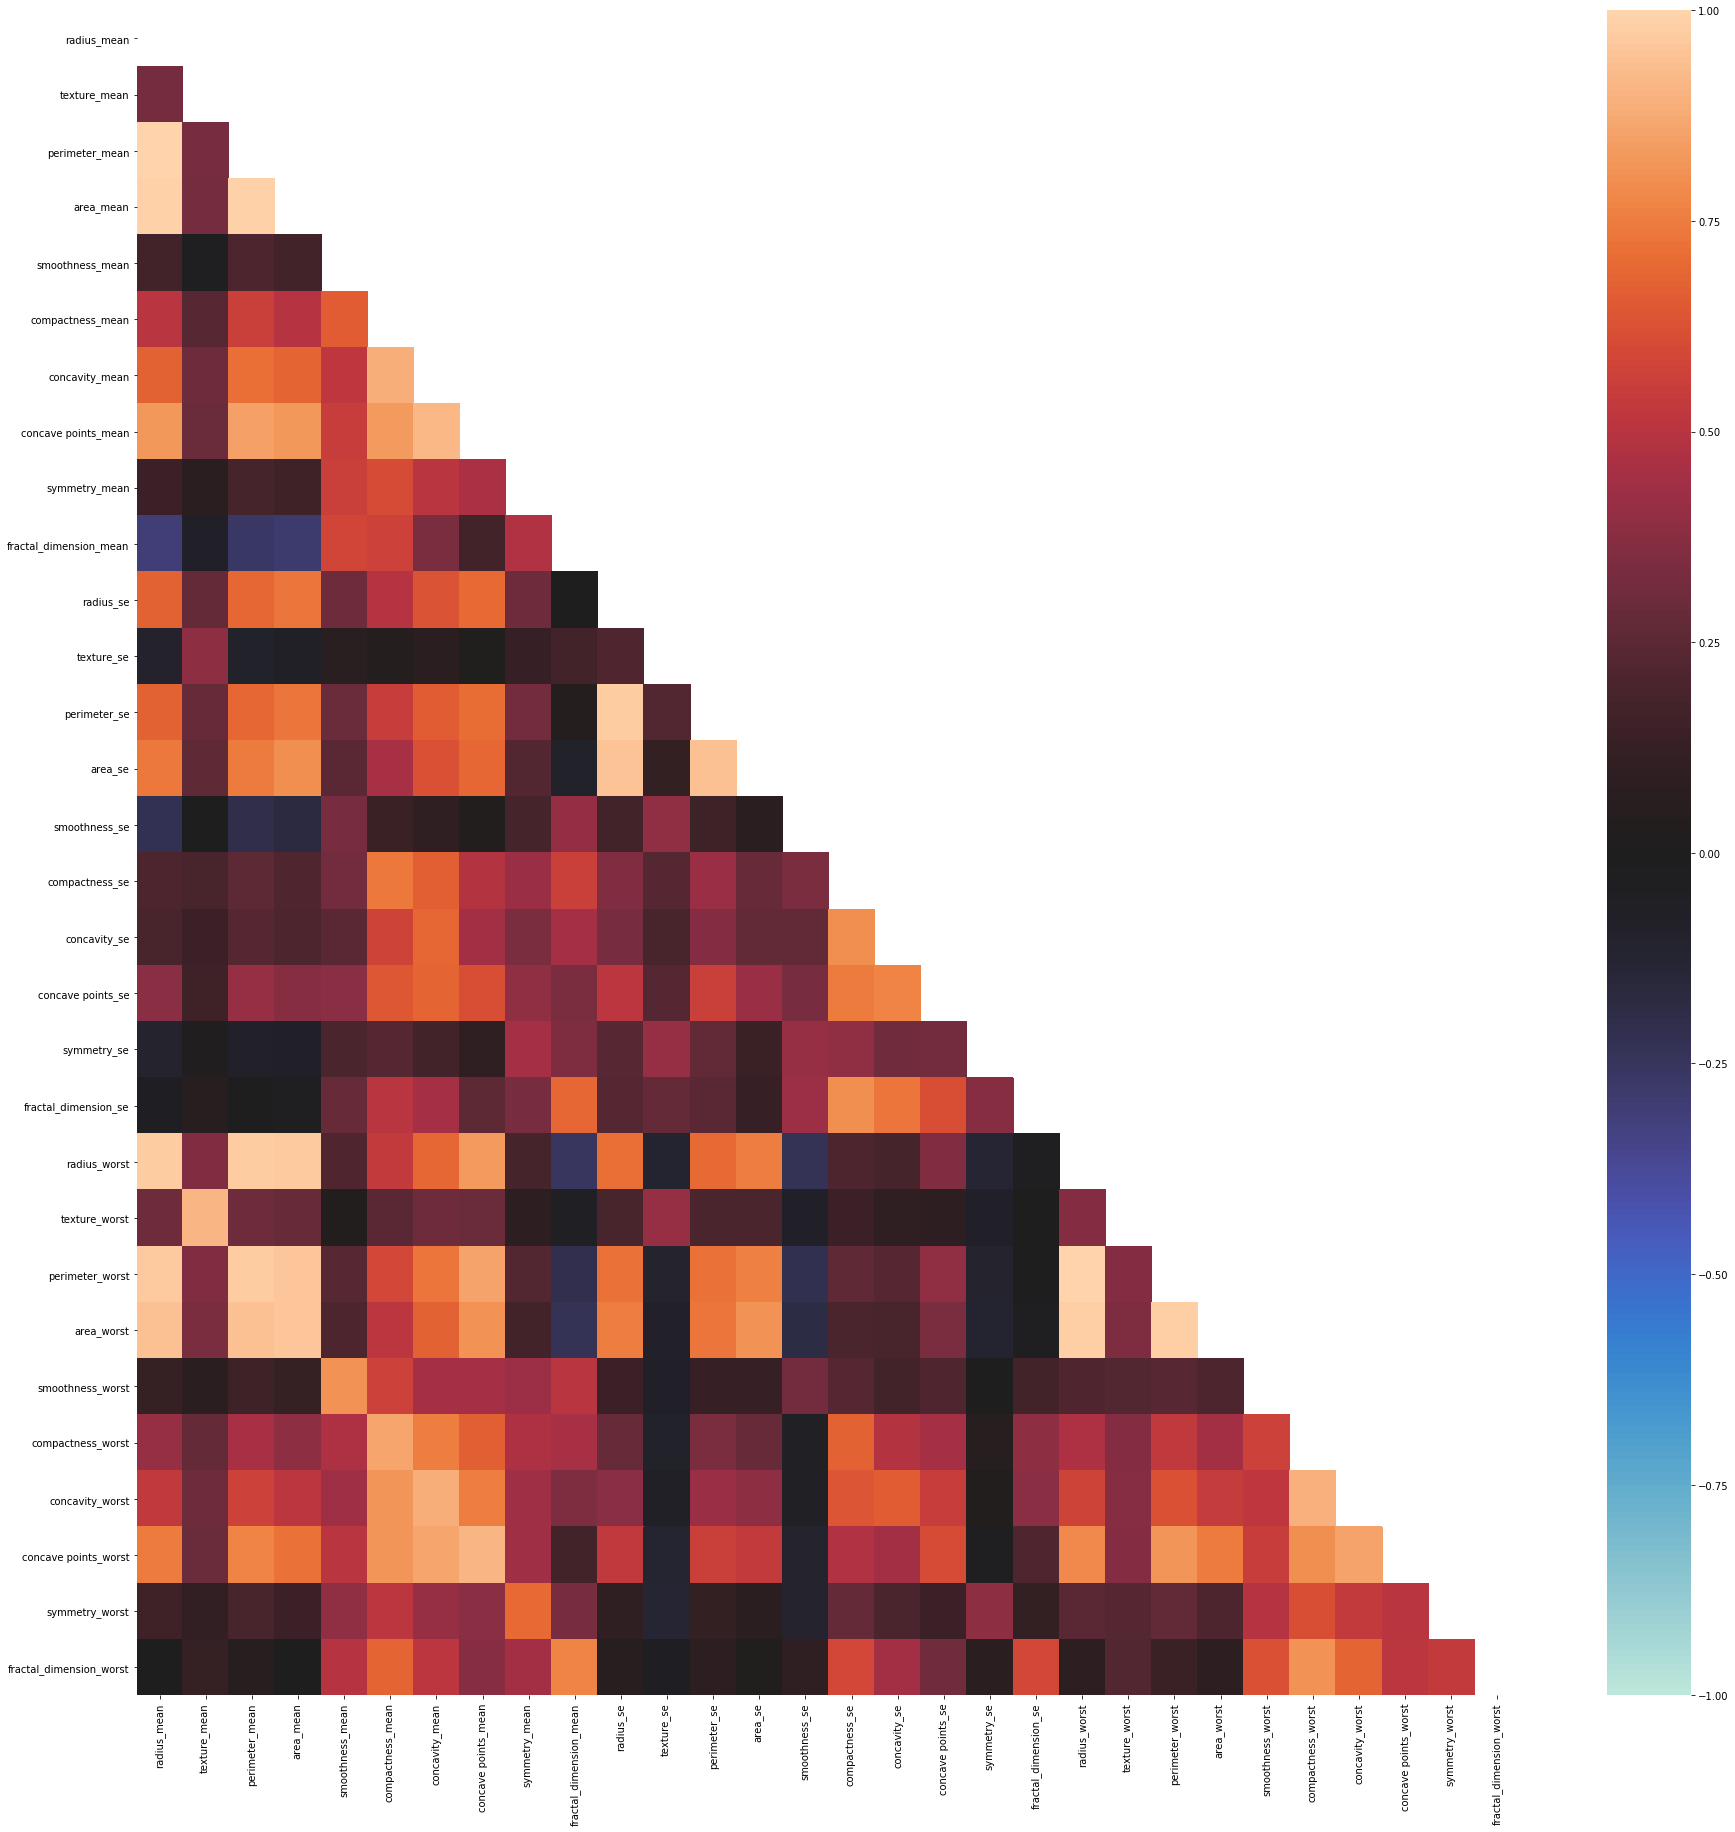

In [21]:
ax = plt.subplots(ncols=1, figsize=(31,31))
corr_matrix = Train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()


In [22]:
Train.skew(axis = 0, skipna = True).sort_values(ascending=False)
Q1 = Train.quantile(0.25)
Q3 = Train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [23]:

print(Train['radius_mean'].quantile(0.10))
print(Train['radius_mean'].quantile(0.90))
print(Train['texture_mean'].quantile(0.10))
print(Train['texture_mean'].quantile(0.90))
print(Train['perimeter_mean'].quantile(0.10))
print(Train['perimeter_mean'].quantile(0.90))
print(Train['area_mean'].quantile(0.10))
print(Train['area_mean'].quantile(0.90))
print(Train['area_se'].quantile(0.10))
print(Train['area_se'].quantile(0.90))
print(Train['radius_worst'].quantile(0.10))
print(Train['radius_worst'].quantile(0.90))
print(Train['texture_worst'].quantile(0.10))
print(Train['texture_worst'].quantile(0.90))
print(Train['perimeter_worst'].quantile(0.10))
print(Train['perimeter_worst'].quantile(0.90))
print(Train['area_worst'].quantile(0.10))
print(Train['area_worst'].quantile(0.90))



Train["radius_mean"] = np.where(Train["radius_mean"] <10.259999999999998, 10.259999999999998,Train['radius_mean'])
Train["radius_mean"] = np.where(Train["radius_mean"] >19.53, 19.53,Train['radius_mean'])
print(Train['radius_mean'].skew())

Train["texture_mean"] = np.where(Train["texture_mean"] <14.078,14.078,Train['texture_mean'])
Train["texture_mean"] = np.where(Train["texture_mean"] >24.991999999999997,24.991999999999997,Train['texture_mean'])
print(Train['texture_mean'].skew())

Train["perimeter_mean"] = np.where(Train["perimeter_mean"] <65.83,65.83,Train['perimeter_mean'])
Train["perimeter_mean"] = np.where(Train["perimeter_mean"] >129.1,129.1,Train['perimeter_mean'])
print(Train['perimeter_mean'].skew())

Train["area_mean"] = np.where(Train["area_mean"] <321.6,321.6,Train['area_mean'])
Train["area_mean"] = np.where(Train["area_mean"]>1177.3999999999999, 1177.3999999999999,Train['area_mean'])
print(Train['area_mean'].skew())

Train["area_se"] = np.where(Train["area_se"] <13.16, 13.16,Train['area_se'])
Train["area_se"] = np.where(Train["area_se"] >91.31399999999998,91.31399999999998,Train['area_se'])
print(Train['area_se'].skew())

Train["radius_worst"] = np.where(Train["radius_worst"] <11.234000000000002, 11.234000000000002,Train['radius_worst'])
Train["radius_worst"] = np.where(Train["radius_worst"] >23.682000000000002,23.682000000000002,Train['radius_worst'])
print(Train['radius_worst'].skew())

Train["texture_worst"] = np.where(Train["texture_worst"] <17.8, 17.8,Train['texture_worst'])
Train["texture_worst"] = np.where(Train["texture_worst"] >33.646, 33.646,Train['texture_worst'])
print(Train['texture_worst'].skew())

Train["perimeter_worst"] = np.where(Train["perimeter_worst"] <72.178,72.178,Train['perimeter_worst'])
Train["perimeter_worst"] = np.where(Train["perimeter_worst"] >157.73999999999998,157.73999999999998,Train['perimeter_worst'])
print(Train['perimeter_worst'].skew())

Train["area_worst"] = np.where(Train["area_worst"] <384.71999999999997,384.71999999999997,Train['area_worst'])
Train["area_worst"] = np.where(Train["area_worst"] >1673.0, 1673.0,Train['area_worst'])
print(Train['area_worst'].skew())


10.259999999999998
19.53
14.078
24.991999999999997
65.83
129.1
321.6
1177.3999999999999
13.16
91.31399999999998
11.234000000000002
23.682000000000002
17.8
33.646
72.178
157.73999999999998
384.71999999999997
1673.0
0.6140152208692718
0.20622717989121642
0.6281792240879032
0.8429626369667277
1.234160470532939
0.7012496558561375
0.10005837767368818
0.6698196119433667
0.9094836085545359


In [24]:

y=data["diagnosis"]
X = data.drop(["diagnosis"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((455, 30), (455,), (114, 30), (114,))

In [32]:
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)



In [33]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = knn.predict(X)

In [35]:
print(metrics.accuracy_score(y, y_pred))

0.9472759226713533


In [37]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544]


Text(0, 0.5, 'Testing Accuracy')

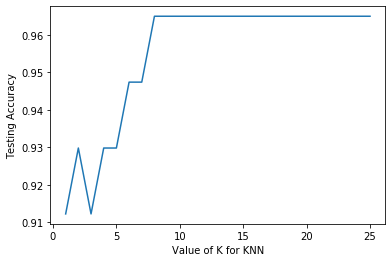

In [39]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [40]:

from sklearn.svm import SVC
classifier=SVC(kernel ='linear', C=1, gamma=1)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9649122807017544


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
# Fit on training data
model.fit(X_train, y_train)

#Prediciting the test set result
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  1],
       [ 2, 45]], dtype=int64)

In [47]:
model.score(X_test,y_test)

0.9736842105263158

[0.06576242 0.02157074 0.09193611 0.06819464 0.00899854 0.02856965
 0.02825969 0.05885604 0.00632057 0.00490137 0.01050642 0.0045689
 0.01490352 0.06197911 0.00583069 0.00601207 0.00846504 0.00671601
 0.00469401 0.00555158 0.09958418 0.02707618 0.09981992 0.07033806
 0.0215923  0.02554794 0.03705373 0.08224144 0.01512919 0.00901993]


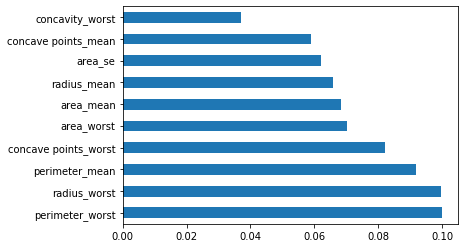

In [48]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
